## SWAP GATE

$  SWAP :=  \frac{1}{2}(\mathbb{1} + \vec{\sigma_{A}} \cdot \vec{\sigma_{B}}) $

$ \frac{1}{2}(\mathbb{1} + \vec{\sigma_{A}} \cdot \vec{\sigma_{B}}) \vert \varphi_A \psi_B  \rangle = \vert \psi_A \varphi_B \rangle $

##### IN THE BASIS  $ \; \vert 0 \rangle ,\;  \vert 1 \rangle $

$ \sigma_{x} = $
$
\begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix} \quad
$
$ \sigma_{y} = $
$
\begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix} \quad
$
$ \sigma_{z} = $
$
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix} 
$

$ \vec{\sigma_{A}} \cdot \vec{\sigma_{B}} = \sigma_{x} \otimes \sigma_{x} + \sigma_{y} \otimes \sigma_{y} + \sigma_{z} \otimes \sigma_{z} $

$\vec{\sigma_{A}} \cdot \vec{\sigma_{B}} = $
$
\begin{pmatrix}
1 &  0 &  0 &  0 \\
0 & -1 &  2 &  0 \\
0 &  2 & -1 &  0 \\
0 &  0 &  0 &  1 \\
\end{pmatrix}
$


$\frac{1}{2}(\mathbb{1} + \vec{\sigma_{A}} \cdot \vec{\sigma_{B}}) =$
$\frac{1}{2} \big(
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix} +
\begin{pmatrix}
1 &  0 &  0 &  0 \\
0 & -1 &  2 &  0 \\
0 &  2 & -1 &  0 \\
0 &  0 &  0 &  1 \\
\end{pmatrix}
\big) =
$
$
\begin{pmatrix}
1 &  0 &  0 &  0 \\
0 &  0 &  1 &  0 \\
0 &  1 &  0 &  0 \\
0 &  0 &  0 &  1 \\
\end{pmatrix}
$

<br />


**The matrix representation of the SWAP gate in the standard basis**

$ U_{SWAP} = $
$
\begin{pmatrix}
1 &  0 &  0 &  0 \\
0 &  0 &  1 &  0 \\
0 &  1 &  0 &  0 \\
0 &  0 &  0 &  1 \\
\end{pmatrix}
$

#### APPLYING SWAP GATE

$\vert\Phi\rangle = \alpha_{ 0} \vert0\rangle + \alpha_{ 1}  \vert1\rangle $

$|\alpha_{ 0}|^2+|\alpha{ 1}|^2 = 1 $

$\vert 0 \rangle = $ 
$
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix} \quad
$
$\vert 1 \rangle = $ 
$
\begin{pmatrix}
0 \\
1 \\
\end{pmatrix}
$

<br />

$ U_{SWAP}  \vert 0 1 \rangle = \vert 1 0  \rangle $

<br />


$
\begin{pmatrix}
1 &  0 &  0 &  0 \\
0 &  0 &  1 &  0 \\
0 &  1 &  0 &  0 \\
0 &  0 &  0 &  1 \\
\end{pmatrix}
$
$
\begin{pmatrix}
0 \\
1 \\
0 \\
0 \\
\end{pmatrix} =
$
$
\begin{pmatrix}
0 \\
0 \\
1 \\
0 \\
\end{pmatrix}
$

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram

from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

#IBMQ.enable_account(token)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

ibmqfactory.load_account:WARNING:2022-06-21 23:29:07,919: Credentials are already in use. The existing account in the session will be replaced.


### STATEVECTOR QISKIT


------------- |0> x |1> -----------



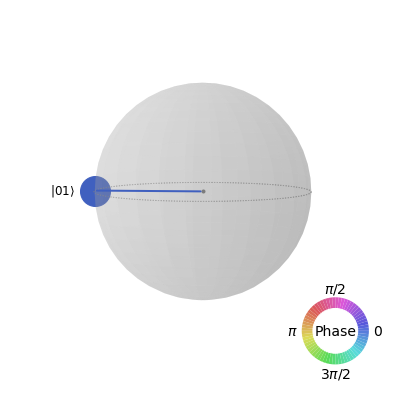


--------- SWAP |0> x |1> ----------



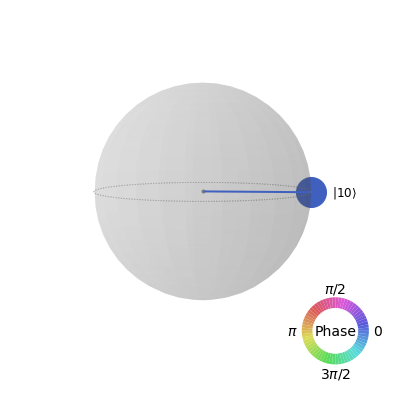


------ CIRCUIT SWAP |0> x |1> -----



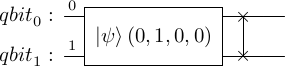

In [26]:
qr = QuantumRegister(2, "qbit")
qc = QuantumCircuit(qr)

qc.initialize(Statevector.from_label('01'))

state0 = Statevector(qc)

#SWAP Gate
qc.swap(qr[0], qr[1])

state1 = Statevector(qc)

print("\n------------- |0> x |1> -----------\n")
display(state0.draw('qsphere'))

print("\n--------- SWAP |0> x |1> ----------\n")
display(state1.draw('qsphere'))

print("\n------ CIRCUIT SWAP |0> x |1> -----\n")
display(qc.draw("latex"))

### IBM QPU

Least Busy: ibm_nairobi
Job Status: job has successfully run

---- |0> x |1> --------------------------------------



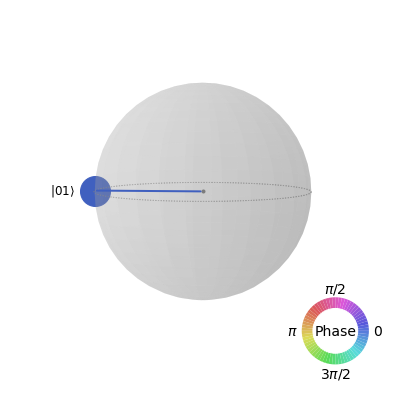


---- SWAP |0> x |1> ---------------------------------



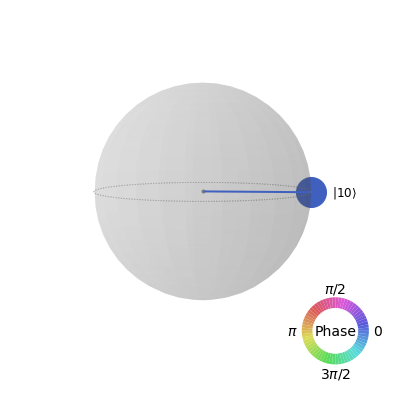


---- SWAP |0> x |1> IBM QPU 1024 SHOTS --------------

{'00': 204, '01': 154, '10': 3538, '11': 104}


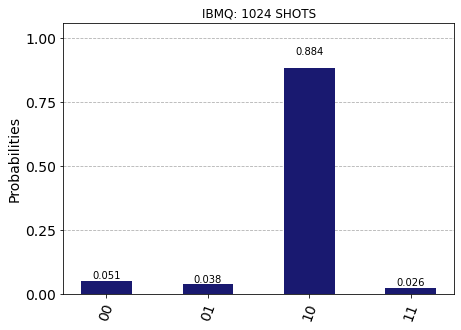

In [30]:
qr = QuantumRegister(2, "qbit")
cr = ClassicalRegister(2, "cbit")
qc = QuantumCircuit(qr, cr)

qc.initialize(Statevector.from_label('01'))

state0 = Statevector(qc)

#SWAP Gate
qc.swap(qr[0], qr[1])

state1 = Statevector(qc)

qc.measure(qr, cr)

# IBM QPU
backend    = least_busy(provider.backends( 
    filters = lambda b: 
    b.configuration().n_qubits >= 2 and not 
    b.configuration().simulator and 
    b.status().operational == True))
print(f"Least Busy: {backend}")

executed    = execute(qc, backend = backend)
job_monitor(executed, interval = 2)
result      = executed.result()
results_qpu = result.get_counts(qc)

print("\n---- |0> x |1> --------------------------------------\n")
display(state0.draw('qsphere'))

print("\n---- SWAP |0> x |1> ---------------------------------\n")
display(state1.draw('qsphere'))

print("\n---- SWAP |0> x |1> IBM QPU 1024 SHOTS --------------\n")
print(results_qpu)
display(plot_histogram(results_qpu, color='midnightblue', title="IBMQ: 1024 SHOTS") )


### QPU AND QASM SIMULATOR - COMPARISON

Least Busy: ibm_nairobi
Job Status: job has successfully run

---- SWAP |0> x |1> QASM SIMULATOR 1024 SHOTS--------

{'10': 4000}


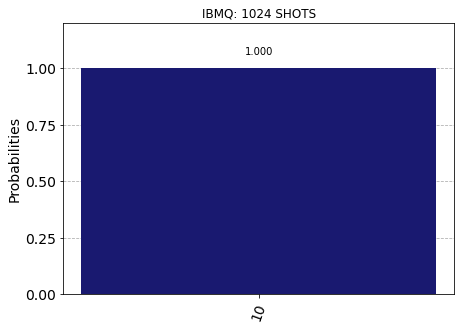


---- SWAP |0> x |1> IBM QPU 1024 SHOTS --------------

{'00': 224, '01': 188, '10': 3489, '11': 99}


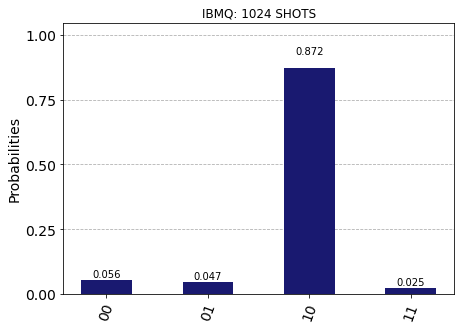

In [31]:
qr = QuantumRegister(2, "qbit")
cr = ClassicalRegister(2, "cbit")
qc = QuantumCircuit(qr, cr)

qc.initialize(Statevector.from_label('01'))

state0 = Statevector(qc)

#SWAP Gate
qc.swap(qr[0], qr[1])

state1 = Statevector(qc)

qc.measure(qr, cr)

# QASM SIMULATOR
backend       = provider.get_backend('ibmq_qasm_simulator')

executed      = execute(qc, backend)
result        = executed.result()
results_qasm  = result.get_counts(qc)

# IBM QPU
backend    = least_busy(provider.backends( 
    filters = lambda b: 
    b.configuration().n_qubits >= 2 and not 
    b.configuration().simulator and 
    b.status().operational == True))
print(f"Least Busy: {backend}")

executed    = execute(qc, backend = backend)
job_monitor(executed, interval = 2)
result      = executed.result()
results_qpu = result.get_counts(qc)


print("\n---- SWAP |0> x |1> QASM SIMULATOR 1024 SHOTS--------\n")
print(results_qasm)
display(plot_histogram(results_qasm, color='midnightblue', title="IBMQ: 1024 SHOTS") )


print("\n---- SWAP |0> x |1> IBM QPU 1024 SHOTS --------------\n")
print(results_qpu)
display(plot_histogram(results_qpu, color='midnightblue', title="IBMQ: 1024 SHOTS") )


#### BIBLIOGRAPHY

[1] Adriano Barenco, Charles H. Bennett, Richard Cleve, David P. DiVincenzo, Norman Margolus, Peter Shor, Tycho Sleator, John A. Smolin, and Harald Weinfurter, Elementary gates for quantum computation, *Phys. Rev. A*, **52**: 3457, Nov 1995.

[2] Michel Le Bellac, *Wstęp do informatyki kwantowej*, Wydawnictwo Naukowe PWN, Warszawa, 2011.